In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [53]:
#read the data
advertising=pd.read_csv(r"C:\Users\lenovo\OneDrive\Desktop\machine learning\advertising.csv")

In [54]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [55]:
advertising.shape

(200, 4)

In [56]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [57]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


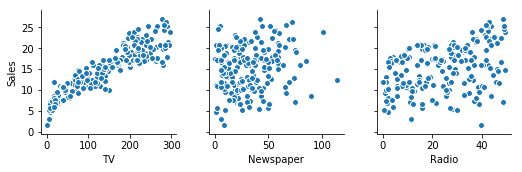

In [58]:
# visualise the data
sns.pairplot(data=advertising, x_vars=['TV','Newspaper','Radio'],y_vars='Sales')

In [59]:
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


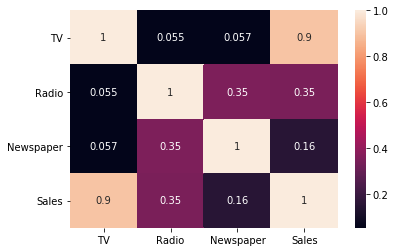

In [60]:
sns.heatmap(advertising.corr(),annot=True)

In [61]:
X=advertising['TV']
y=advertising['Sales']

In [62]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [63]:
#training the model
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [64]:
#fitting the model
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [65]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sun, 26 Apr 2020   Prob (F-statistic):           1.52e-52
Time:                        17:10:33   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
y_train_pred=lr_model.predict(X_train_sm)


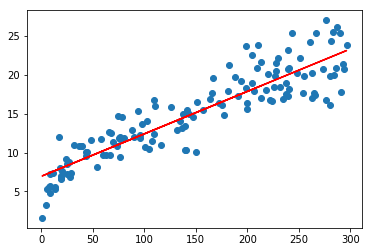

In [72]:
plt.scatter(X_train,y_train)
plt.plot(X_train, y_train_pred, 'r')
plt.show()

In [74]:
res=y_train-y_train_pred
res

74    -1.588747
3      1.287635
185    4.469437
26     0.256729
90    -0.274178
127    0.576747
81    -2.728755
88     1.134927
119   -1.406871
110   -0.865114
57    -1.177815
44     0.182218
148    1.878578
160    0.042174
89     3.762193
146   -1.845118
199   -1.208752
10     2.045843
20    -0.861476
165   -2.839662
12     0.953128
16     1.853115
101    0.683956
120    0.844002
45    -0.399645
142    1.123978
117   -1.715979
184   -3.192395
187   -0.072377
183    3.563958
         ...   
129   -0.499610
159   -1.232359
132   -1.706868
108   -2.363233
155   -3.972321
130   -5.386865
86     0.889476
93     1.565787
137   -1.077856
144    0.104015
58     5.353072
60    -1.766881
107    0.120381
143   -2.254169
198    3.082141
34    -0.268712
14     0.918529
66     2.333126
53     4.291262
98     2.649412
180    0.009452
94    -1.306897
138    0.305849
176   -0.297848
79    -2.275991
87     3.013102
103    2.502170
67    -1.146907
24    -0.646884
8     -2.617777
Length: 140, dtype: floa

Text(0.5,1,'Residual Plot')

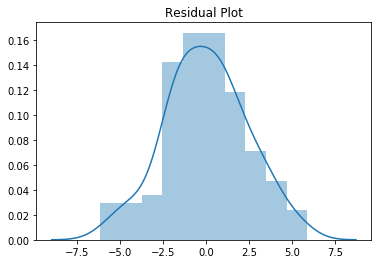

In [76]:
plt.figure()
sns.distplot(res)
plt.title("Residual Plot")

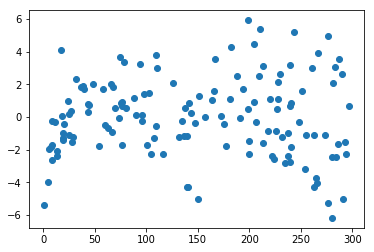

In [77]:
plt.scatter(X_train,res)
plt.show()

In [80]:
#add a cons/intercept to test
X_test_sm=sm.add_constant(X_test)

#pred on test
y_test_pred=lr_model.predict(X_test_sm)


In [86]:
#r2 on test
r2=r2_score(y_test,y_test_pred)
r2

0.7921031601245658

In [89]:
#r2 on train
r2=r2_score(y_train,y_train_pred)
r2

0.8157933136480389

In [92]:
mean_squared_error(y_test,y_test_pred)

4.077556371826956

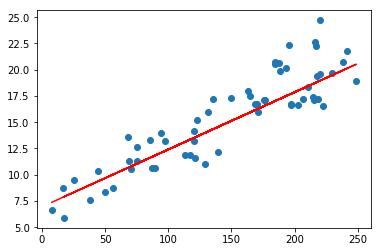

In [93]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_test_pred,'r')
plt.show()

### from sklearn 

In [97]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [105]:
X_train.shape
X_train_lm=X_train.values.reshape(-1,1)
X_test_lm=X_test.values.reshape(-1,1)


In [98]:
lm=LinearRegression()

In [106]:
lm.fit(X_train_lm,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [109]:
print(lm.coef_)
print(lm.intercept_)

[0.05454575]
6.948683200001357


In [112]:
y_tarin_pred=lm.predict(X_train_lm)
y_test_pred=lm.predict(X_test_lm)

In [114]:
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.8157933136480389
0.7921031601245662
